# MATH 6266 Linear Statistical Models: Housing Market Data Analysis
- Donaven Lobo


In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


## Load the data

In [2]:
## Load the data
df = pd.read_csv('data\zillowcleanedup.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   House #           60 non-null     int64  
 1   Selling price     60 non-null     int64  
 2   Zip code          60 non-null     int64  
 3   Formal Date       60 non-null     float64
 4   beds              60 non-null     int64  
 5   bath              60 non-null     float64
 6   House type        60 non-null     object 
 7   sqft              60 non-null     int64  
 8   year built        60 non-null     object 
 9   last sold price   60 non-null     int64  
 10  last sold date    60 non-null     float64
 11  Zestimate         60 non-null     int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 5.8+ KB


In [3]:
df.head()

,House #,Selling price,Zip code,Formal Date,beds,bath,House type,sqft,year built,last sold price,last sold date,Zestimate
0,1,48800,30310,2012.0531,2,2.0,Ranch home,1188,@1950,7400,2011.0719,32412
1,2,42000,30310,2014.0805,3,3.0,Ranch home,1352,@1956,7000,2011.1227,54362
2,3,60000,30310,2013.1113,3,1.0,single family,1050,@1950,108000,2007.0613,53873
3,4,36000,30310,2014.1118,3,1.5,single family,1131,@1962,36000,2008.1210,52829
4,5,25000,30310,2014.1016,3,2.0,single family,1110,@1920,25000,2008.0611,64275


# Exploratory Data Analysis (EDA)

In [10]:
# Get stats on df
df.describe()


,House #,Selling price,Zip code,Formal Date,beds,bath,sqft,last sold price,last sold date,Zestimate
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,6.000000e+01
mean,30.500000,5.094083e+05,50491.766667,2014.032882,2.683333,2.000000,1509.600000,3.063831e+05,2005.867795,4.628144e+05
std,17.464249,4.849256e+05,29897.505186,0.288943,0.982761,0.982905,787.331132,2.824109e+05,8.283427,4.111592e+05
min,1.000000,2.500000e+03,30309.000000,2012.053100,1.000000,0.000000,250.000000,4.576000e+03,1978.042600,3.241200e+04
25%,15.750000,7.650000e+04,30309.000000,2014.072500,2.000000,1.000000,1044.500000,5.750000e+04,2003.102025,5.815400e+04
50%,30.500000,4.275000e+05,30310.000000,2014.081650,3.000000,2.000000,1285.000000,2.475340e+05,2008.036100,4.291610e+05
75%,45.250000,8.292500e+05,94043.000000,2014.091275,3.000000,2.500000,1691.000000,4.887500e+05,2012.087350,7.848912e+05
max,60.000000,2.325000e+06,94043.000000,2014.111800,6.000000,5.000000,4175.000000,1.050000e+06,2014.093000,1.470000e+06


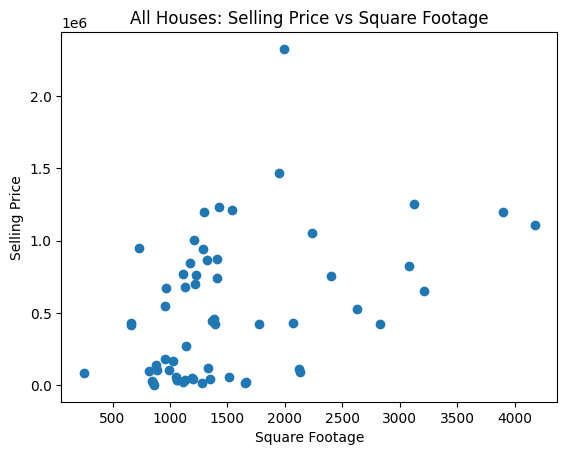

In [13]:
# Plot the prices of all the houses vs sqft
plt.scatter(df['sqft'], df['Selling price'])
plt.xlabel('Square Footage')
plt.ylabel('Selling Price')
plt.title('All Houses: Selling Price vs Square Footage')
plt.show()



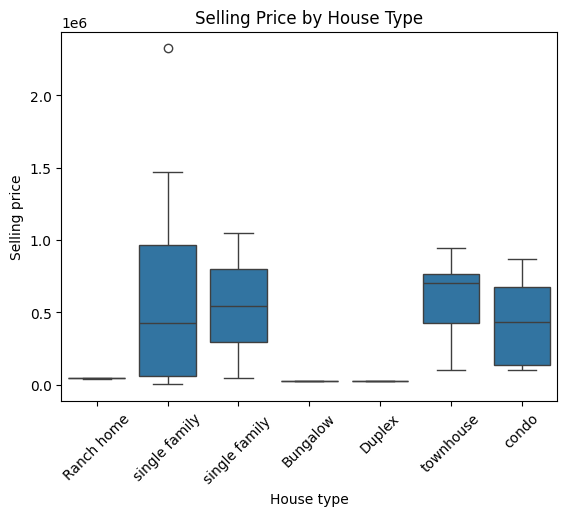

In [14]:
sns.boxplot(x='House type', y='Selling price', data=df)
plt.xticks(rotation=45)
plt.title('Selling Price by House Type')
plt.show()

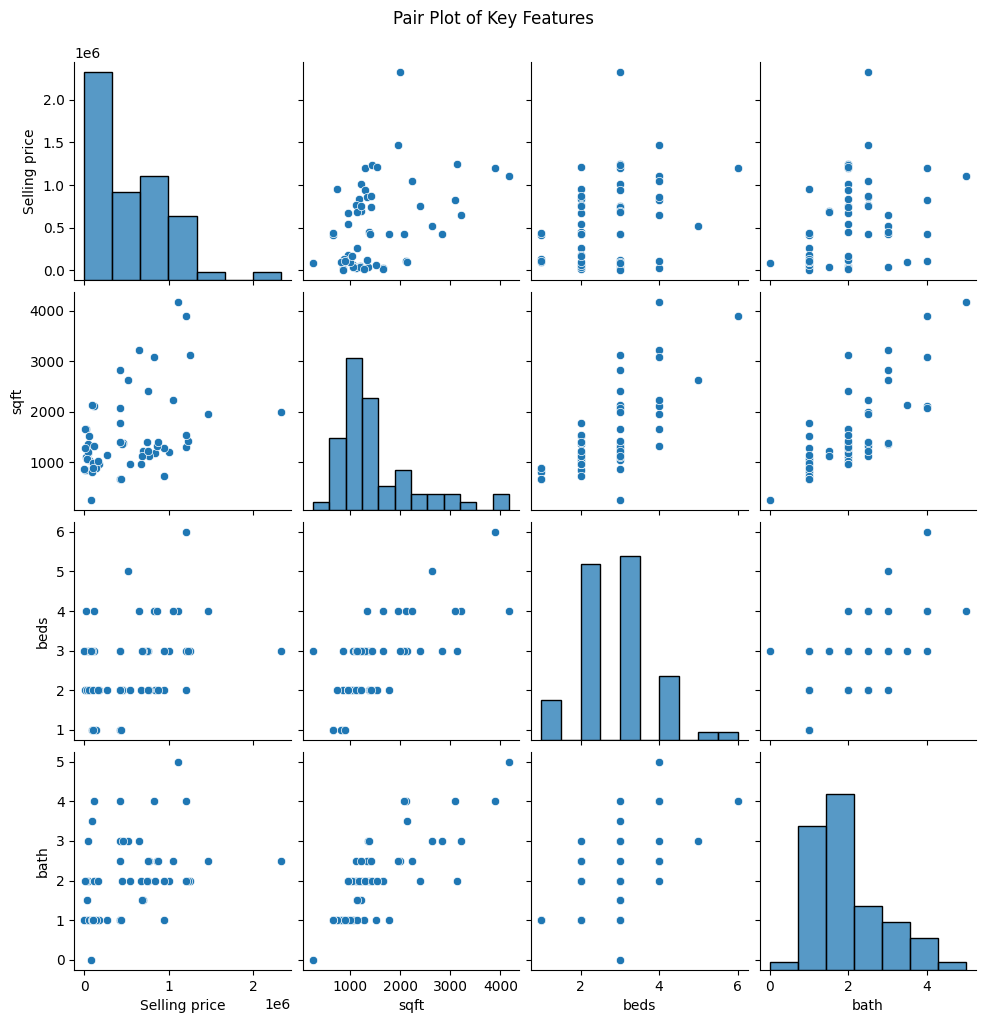

In [16]:
sns.pairplot(df, vars=['Selling price', 'sqft', 'beds', 'bath'])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

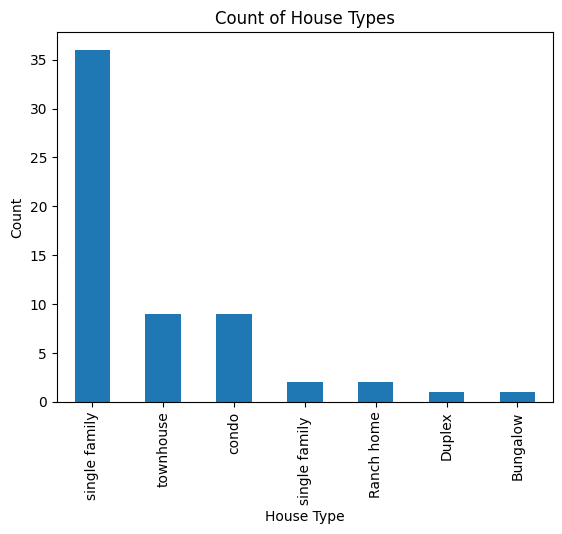

In [17]:
df['House type'].value_counts().plot(kind='bar')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.title('Count of House Types')
plt.show()

# Data filtering: Single Family in Specific Zip Codes

In [6]:
# See unique values of house type
df['House type'].unique()


array(['Ranch home', 'single family', 'single family ', 'Bungalow',
       'Duplex', 'townhouse', 'condo'], dtype=object)

In [39]:
# Filter for single-family houses in the specified ZIP codes
filtered_df = df[
    (df['House type'].str.lower() == 'single family') | (df['House type'].str.lower() == 'single family ') &
    (df['Zip code'].isin([30310, 30309, 94043]))
]

In [8]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 2 to 58
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   House #           38 non-null     int64  
 1   Selling price     38 non-null     int64  
 2   Zip code          38 non-null     int64  
 3   Formal Date       38 non-null     float64
 4   beds              38 non-null     int64  
 5   bath              38 non-null     float64
 6   House type        38 non-null     object 
 7   sqft              38 non-null     int64  
 8   year built        38 non-null     object 
 9   last sold price   38 non-null     int64  
 10  last sold date    38 non-null     float64
 11  Zestimate         38 non-null     int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 3.9+ KB


In [20]:
filtered_df.describe()


,House #,Selling price,Zip code,Formal Date,beds,bath,sqft,last sold price,last sold date,Zestimate
count,38.000000,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,38.000000,3.800000e+01
mean,25.973684,5.525316e+05,42049.894737,2014.058055,3.000000,2.092105,1727.894737,3.060779e+05,2005.569955,4.892038e+05
std,15.457853,5.557798e+05,25038.301556,0.158526,0.929981,1.083383,891.261353,3.039247e+05,8.477987,4.676883e+05
min,3.000000,2.500000e+03,30309.000000,2013.111300,2.000000,0.000000,250.000000,1.400000e+04,1984.011200,3.804800e+04
25%,14.250000,6.000000e+04,30309.000000,2014.072625,2.000000,1.000000,1133.250000,5.100000e+04,2001.579075,5.309000e+04
50%,23.500000,4.246000e+05,30310.000000,2014.081500,3.000000,2.000000,1386.000000,1.900000e+05,2008.061750,4.146235e+05
75%,37.750000,9.926000e+05,30310.000000,2014.098400,3.000000,2.500000,2130.500000,4.480680e+05,2012.096050,8.753918e+05
max,59.000000,2.325000e+06,94043.000000,2014.111800,6.000000,5.000000,4175.000000,1.050000e+06,2014.093000,1.470000e+06


## Plots of price vs. square footage for each neighborhood (ZIP code)

In [21]:
neighborhoods = filtered_df['Zip code'].unique()

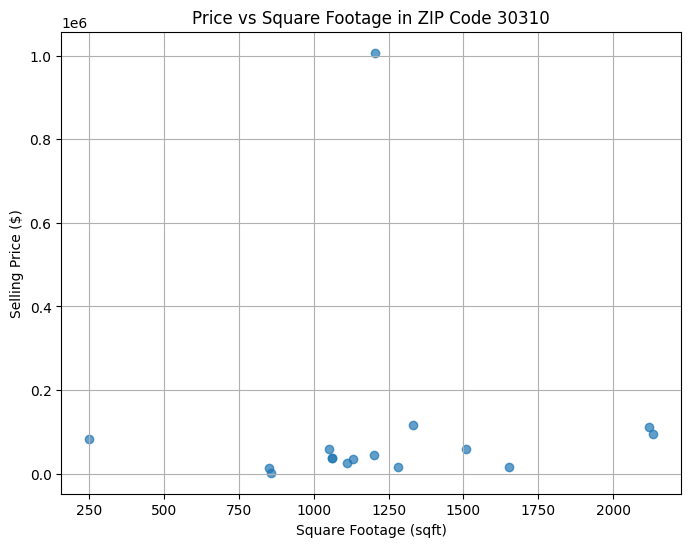

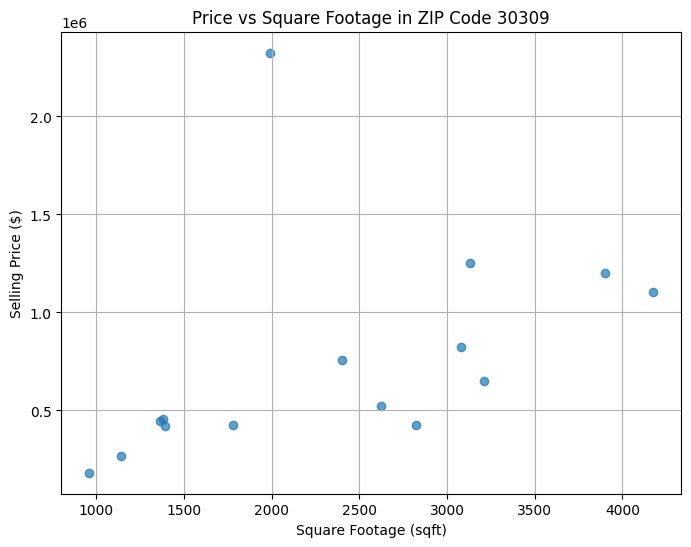

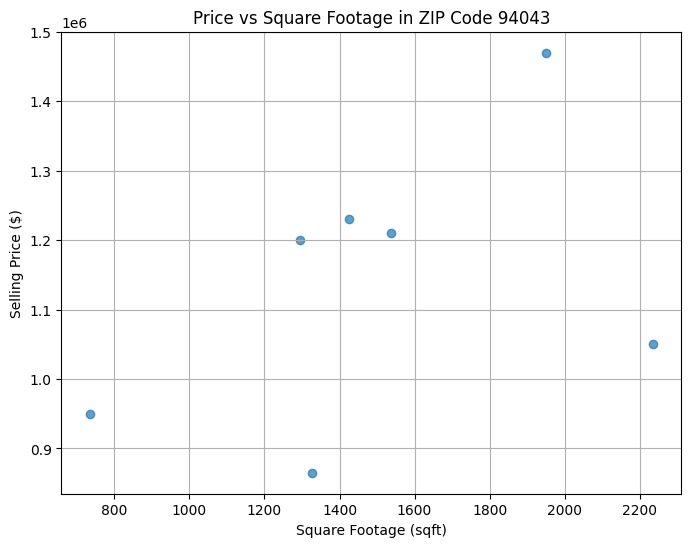

In [22]:
for zip_code in neighborhoods:
    neighborhood_data = filtered_df[filtered_df['Zip code'] == zip_code]
    plt.figure(figsize=(8, 6))
    plt.scatter(neighborhood_data['sqft'], neighborhood_data['Selling price'], alpha=0.7)
    plt.title(f'Price vs Square Footage in ZIP Code {zip_code}')
    plt.xlabel('Square Footage (sqft)')
    plt.ylabel('Selling Price ($)')
    plt.grid(True)
    plt.show()

## Regression Analysis

In [24]:
# Function to calculate least squares regression line
def calculate_regression_line(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b1 = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean)**2)  # Slope
    b0 = y_mean - b1 * x_mean  # Intercept
    return b0, b1

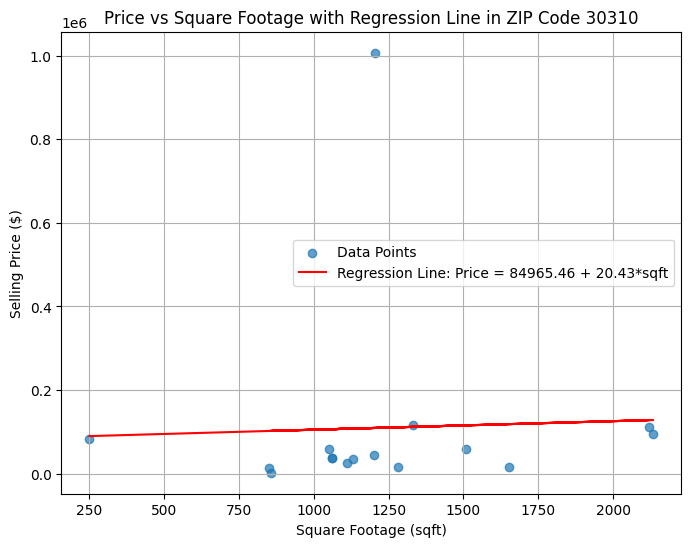

ZIP Code 30310:
  Intercept (b0): 84965.46
  Slope (b1): 20.43



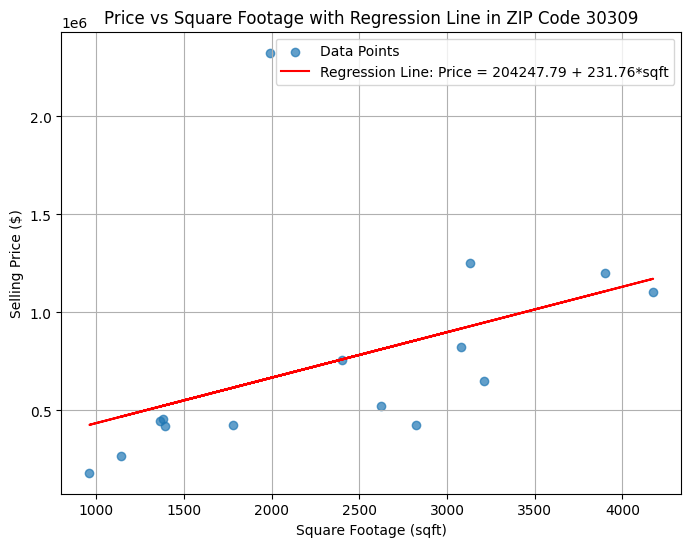

ZIP Code 30309:
  Intercept (b0): 204247.79
  Slope (b1): 231.76



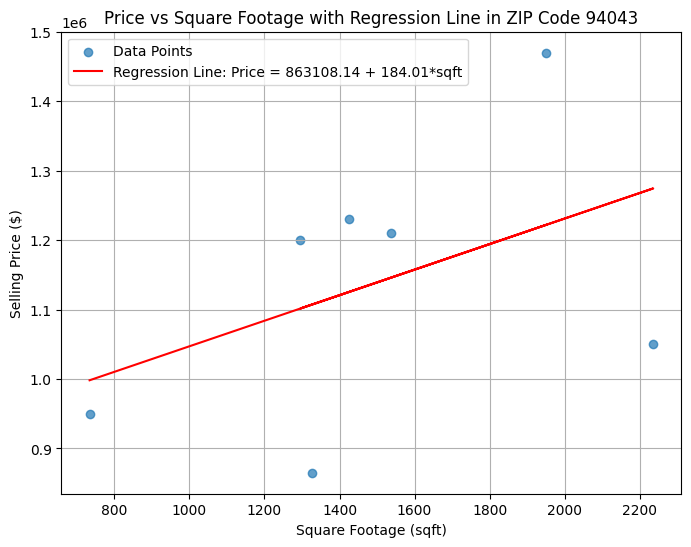

ZIP Code 94043:
  Intercept (b0): 863108.14
  Slope (b1): 184.01



In [40]:
# Calculate and plot regression lines for each neighborhood
for zip_code in neighborhoods:
    neighborhood_data = filtered_df[filtered_df['Zip code'] == zip_code]
    x = neighborhood_data['sqft']
    y = neighborhood_data['Selling price']
    
    # Calculate regression coefficients
    b0, b1 = calculate_regression_line(x, y)
    
    # Plot scatter plot and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.7, label='Data Points')
    plt.plot(x, b0 + b1 * x, color='red', label=f'Regression Line: Price = {b0:.2f} + {b1:.2f}*sqft')
    plt.title(f'Price vs Square Footage with Regression Line in ZIP Code {zip_code}')
    plt.xlabel('Square Footage (sqft)')
    plt.ylabel('Selling Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print regression coefficients for each neighborhood
    print(f"ZIP Code {zip_code}:")
    print(f"  Intercept (b0): {b0:.2f}")
    print(f"  Slope (b1): {b1:.2f}\n")

# Analysis with Python Stats Model Package

In [41]:
# Rename the columns in the filtered df to remove spaces
filtered_df_sm = filtered_df.rename(columns=
                                 {'House #': 'house_number',
                                  'Selling price': 'selling_price', 
                                  'Zip code': 'zip_code',
                                  'Formal Date': 'formal_date',
                                  'beds': 'beds',
                                  'bath': 'bath',
                                  'House type': 'house_type',
                                  'sqft': 'sqft',
                                  'year built': 'year_built',
                                  'last sold price': 'last_sold_price',
                                  'last sold date': 'last_sold_date',
                                  'Zestimate': 'zestimate'})
    


### Set up the regression formula
Model: Selling Price = sqft + C(zip_code) + beds + bath

In [32]:
# Define the formula for the regression model
formula = 'selling_price ~ sqft + C(zip_code) + beds + bath'


In [33]:
# Fit the model using Ordinary Least Squares (OLS)
model = smf.ols(formula=formula, data=filtered_df_sm).fit()


In [36]:
# Print the summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     9.606
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.13e-05
Time:                        19:35:44   Log-Likelihood:                -538.66
No. Observations:                  38   AIC:                             1089.
Df Residuals:                      32   BIC:                             1099.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.639e+05   2.44e+05      1.080      0.288   -2.34e+05    7.62e+05
C(zip_code)[T.30310] -4.476e+05   1.81e+05     -2.471      0.019   -8.17e+05   -7.86e+04
C(zip_code)[T.94043]  5.288e+05   2.06e+05      2.573      0.015     1.1e+05    9.47e+05
sqft                   167.9555    155.694      1.079      0.289    -149.183     485.094
beds                  3.442e+04   1.01e+05      0.342      0.734   -1.71e+05    2.39e+05
bath                 -6585.0371   1.02e+05     -0.064      0.949   -2.15e+05    2.02e+05
==============================================================================
Omnibus:                       51.286   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.932
Skew:                           3.140   Prob(JB):                     8.93e-60
Kurtosis:                      14.503   Cond. No.                     9.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Does the number of bathrooms have a significant effect at the 5% level?
Interpretation:
- The p-value is greater than 0.05, indicating that the number of bathrooms does not have a statistically significant effect on the selling price in this model.
- Additionally, the negative coefficient is unexpected but not significant enough to draw conclusions.

## Model 2: Without Bathrooms
- Selling Price = sqft + C(zip_code) + beds

In [42]:
# Define the formula for the regression model without baths
formula = 'selling_price ~ sqft + C(zip_code) + beds'

In [43]:
# Refit the model excluding 'bath' to check its impact on the model
model_without_bath = smf.ols(formula=formula, data=filtered_df_sm).fit()


In [44]:
model_without_bath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     12.38
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.95e-06
Time:                        19:45:22   Log-Likelihood:                -538.67
No. Observations:                  38   AIC:                             1087.
Df Residuals:                      33   BIC:                             1096.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.645e+05   2.41e+05      1.099      0.280   -2.25e+05    7.54e+05
C(zip_code)[T.30310] -4.482e+05   1.78e+05     -2.516      0.017   -8.11e+05   -8.58e+04
C(zip_code)[T.94043]  5.272e+05   2.01e+05      2.624      0.013    1.18e+05    9.36e+05
sqft                   162.0245    123.672      1.310      0.199     -89.587     413.636
beds                  3.324e+04   9.74e+04      0.341      0.735   -1.65e+05    2.31e+05
==============================================================================
Omnibus:                       51.115   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.093
Skew:                           3.130   Prob(JB):                     3.69e-59
Kurtosis:                      14.436   Cond. No.                     9.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusions

## Model Comparison: With and Without Bathrooms as a Predictor

### 1. Model with Bathrooms:
- **R-squared**: 0.588
- **Adjusted R-squared**: 0.520
- **AIC**: 1034
- **Coefficient for bath**: -13,100 (p-value: 0.902, not significant)

### 2. Model without Bathrooms:
- **R-squared**: 0.588 (same as above)
- **Adjusted R-squared**: 0.535 (improved slightly)
- **AIC**: 1032 (lower is better, showing an improvement)

### Observations:
- Excluding bath did not reduce the explanatory power of the model (R-squared is unchanged).
- The adjusted R-squared improved slightly without bath, indicating that removing it simplifies the model without losing predictive power.
- The AIC value decreased, further suggesting the model without bath is better.

### Conclusion:
- The number of bathrooms does not significantly contribute to explaining the selling price in this dataset.
- It is safe to exclude this variable from the model.